In [5]:
import pandas as pd
import numpy as np
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import RMSprop, Adam 
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
import matplotlib.pyplot as plt

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
# Data preprocessing
x_train_4D = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test_4D = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

x_train_4D_normalized = x_train_4D / 255
x_test_4D_normalized = x_test_4D / 255

y_train_oneHotEncoding = to_categorical(y_train)
y_test_oneHotEncoding = to_categorical(y_test)

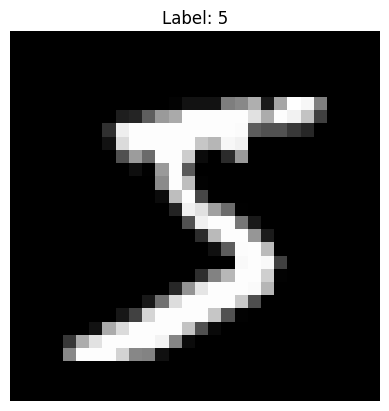

In [8]:
# Display an instance from the dataset
index = 0
plt.imshow(x_train_4D_normalized[index].reshape(28, 28), cmap='gray')
plt.title(f"Label: {np.argmax(y_train_oneHotEncoding[index])}")
plt.axis('off')  # Hide axis ticks and labels
plt.show()

In [9]:
# Build the neural network model
model = Sequential()

# Convolutional layers with batch normalization and dropout
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size=4, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))  # Output layer

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        25632     
                                                                 
 batch_normalization_2 (Bat  (None, 12, 12, 32)        1

In [10]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
train_history = model.fit(x=x_train_4D_normalized, 
                          y=y_train_oneHotEncoding, 
                          validation_split=0.2, 
                          epochs=10, 
                          batch_size=128, 
                          verbose=2)

Epoch 1/10
375/375 - 20s - loss: 0.2525 - accuracy: 0.9225 - val_loss: 0.3498 - val_accuracy: 0.8884 - 20s/epoch - 55ms/step
Epoch 2/10
375/375 - 33s - loss: 0.0672 - accuracy: 0.9802 - val_loss: 0.0401 - val_accuracy: 0.9885 - 33s/epoch - 89ms/step
Epoch 3/10
375/375 - 32s - loss: 0.0509 - accuracy: 0.9839 - val_loss: 0.0505 - val_accuracy: 0.9859 - 32s/epoch - 86ms/step
Epoch 4/10
375/375 - 33s - loss: 0.0430 - accuracy: 0.9868 - val_loss: 0.0321 - val_accuracy: 0.9911 - 33s/epoch - 87ms/step
Epoch 5/10
375/375 - 31s - loss: 0.0350 - accuracy: 0.9888 - val_loss: 0.0355 - val_accuracy: 0.9898 - 31s/epoch - 84ms/step
Epoch 6/10
375/375 - 32s - loss: 0.0345 - accuracy: 0.9894 - val_loss: 0.0279 - val_accuracy: 0.9921 - 32s/epoch - 85ms/step
Epoch 7/10
375/375 - 35s - loss: 0.0292 - accuracy: 0.9905 - val_loss: 0.0303 - val_accuracy: 0.9916 - 35s/epoch - 93ms/step
Epoch 8/10
375/375 - 49s - loss: 0.0267 - accuracy: 0.9916 - val_loss: 0.0303 - val_accuracy: 0.9918 - 49s/epoch - 132ms/step

In [11]:
# Evaluate the model on test data
scores = model.evaluate(x_test_4D_normalized, y_test_oneHotEncoding)
accuracy = scores[1]

# Make predictions on test data
predictions = model.predict(x_test_4D_normalized)
predicted_classes = np.argmax(predictions, axis=1)


pd.crosstab(y_test, predicted_classes, rownames=['label'], colnames=['predict'])

313/313 [==============================] - 3s 8ms/step


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,977,0,0,0,0,0,2,1,0,0
1,0,1133,1,1,0,0,0,0,0,0
2,0,0,1028,0,0,0,0,4,0,0
3,0,1,1,1007,0,1,0,0,0,0
4,0,0,0,0,974,0,0,0,0,8
5,0,0,0,7,0,883,1,1,0,0
6,2,2,0,0,0,1,951,0,2,0
7,0,4,4,0,0,0,0,1019,0,1
8,1,0,1,0,0,0,0,0,970,2
